<h1 style="color:rgb(0,120,170)">PCA and Kernel PCA</h1>

<h2 style="color:rgb(0,120,170)">Task 2: PCA applied to real world data set</h2>

We use the provided data set faces94.csv which is essentially based
on the pictures from the collection of Facial Images 1. This data set consists of $45 \times 50$
gray scale pixel images.
Let us first read in the data and plot the first image as an example.
This exercise should give you a feeling of what it really means to preserve variance.

In [1]:
#read data. Nothing to do here
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
# import data from csv file,
data = np.genfromtxt('faces94.csv', delimiter=',')

In [2]:
data.shape

(3059, 2250)

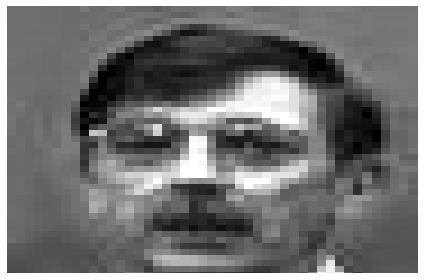

In [3]:
#plot first image as an example. Nothing to do here
def plotImg(x, title = ""):
    fig, ax = plt.subplots()
    ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
    ax.set_ylim([45, 0])
    ax.axis("off")
    fig.tight_layout()
    plt.title(title)
# plot first img
plotImg(data[0, :])

<h3 style="color:rgb(0,120,170)">Task:</h3>

* We next use PCA for data-compression. Downproject the data using enough PCs to
explain $50 \% $, $75 \% $ and $99 \% $ of the variance. To do this use the sklearn-package. Print the number of principal components needed and also the explained variance for each of the tasks. 

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

In [4]:
########## YOUR SOLUTION HERE ##########
pca = PCA().fit(data)


In [5]:
def downprojection(variance: float):
    pca_com = np.argwhere(pca.explained_variance_ratio_.cumsum() >= variance).min() + 1
    explained_variance_bro = pca.explained_variance_ratio_
    
    return pca_com, explained_variance_bro

print(downprojection(0.5))
print(downprojection(0.75))
print(downprojection(0.99))

(4, array([2.68894776e-01, 1.31911951e-01, 6.73019790e-02, ...,
       2.95409713e-09, 2.70567278e-09, 2.43842408e-09]))
(18, array([2.68894776e-01, 1.31911951e-01, 6.73019790e-02, ...,
       2.95409713e-09, 2.70567278e-09, 2.43842408e-09]))
(367, array([2.68894776e-01, 1.31911951e-01, 6.73019790e-02, ...,
       2.95409713e-09, 2.70567278e-09, 2.43842408e-09]))


<h3 style="color:rgb(0,120,170)">Task:</h3>

* You have essentially compressed vectors of dimension $d = 2250$ into vectors of much smaller dimension. Implement a function, that decompresses the data again, i.e. reconstruct the $2250$ dimensional data points, given the lower-dimensional representation. Print the dimension of the back-transformed data and the back-transformed data itself to check, if your result is indeed correct. 

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

In [6]:
########## YOUR SOLUTION HERE ##########
for var in [0.5, 0.75, .99]:
    components, _ = downprojection(var)
    down = PCA(n_components=components).fit(data)

    transformed = down.transform(data)
    
    inverse = down.inverse_transform(transformed)
    print(f'Original shape: {data.shape} | new shape: {inverse.shape}')
    print('Original Data:')
    print(data)
    print(f'Transformed Data ({var * 100}% information):')
    print(inverse)
    print()

Original shape: (3059, 2250) | new shape: (3059, 2250)
Original Data:
[[0.43137255 0.43137255 0.43137255 ... 0.35294118 0.3372549  0.34117647]
 [0.16078431 0.16470588 0.16862745 ... 0.04705882 0.61960784 0.8       ]
 [0.45882353 0.46666667 0.47843137 ... 0.36078431 0.34117647 0.34117647]
 ...
 [0.35294118 0.35686275 0.36862745 ... 0.39215686 0.40392157 0.40784314]
 [0.25882353 0.25882353 0.25098039 ... 0.18039216 0.22352941 0.24705882]
 [0.4627451  0.46666667 0.47058824 ... 0.42745098 0.51372549 0.46666667]]
Transformed Data (50.0% information):
[[0.42840882 0.43059126 0.43091681 ... 0.38034443 0.39873541 0.39595712]
 [0.23631958 0.23651491 0.23589331 ... 0.22359998 0.28735789 0.32794498]
 [0.51343113 0.51558086 0.51575554 ... 0.41174673 0.38788728 0.36207779]
 ...
 [0.38330446 0.38472325 0.38627759 ... 0.29896584 0.33240765 0.3350228 ]
 [0.2472381  0.24740341 0.24664083 ... 0.2579839  0.31780691 0.36105966]
 [0.42345179 0.42465802 0.42334737 ... 0.33008091 0.31708656 0.30851186]]

Ori

<h3 style="color:rgb(0,120,170)">Task:</h3>

* Plot a few of the images and their reconstructions with $50 \% $, $75 \% $ and $99 \% $ of the variance.

<h3 style="color:rgb(210,90,80)">Code (15 points):</h3>

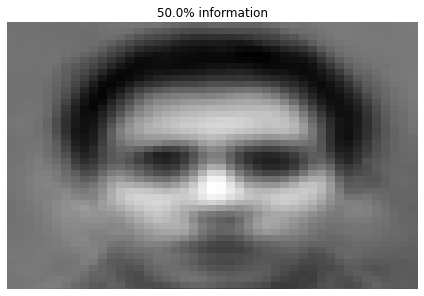

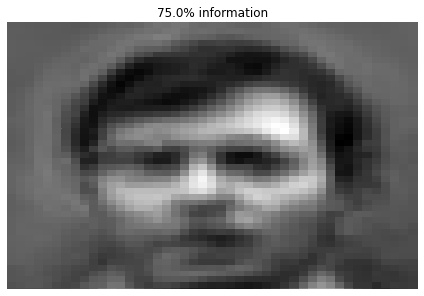

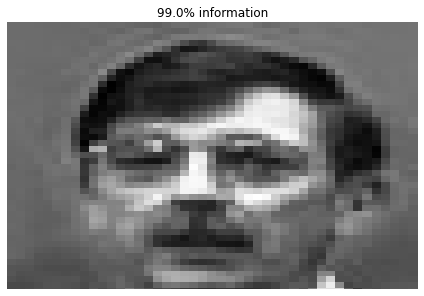

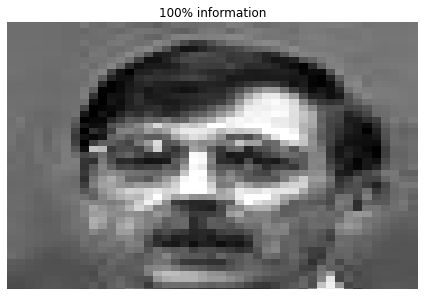

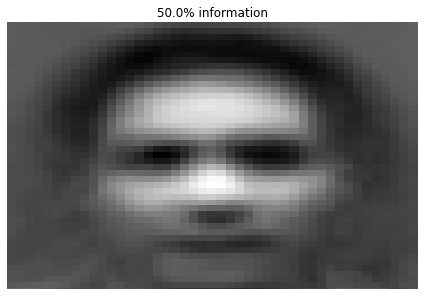

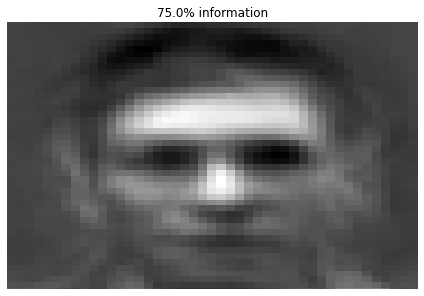

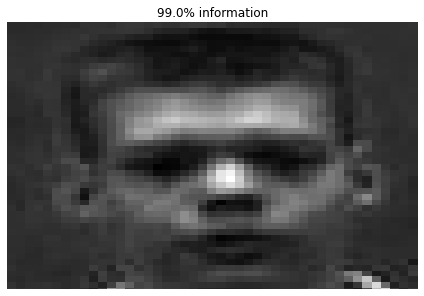

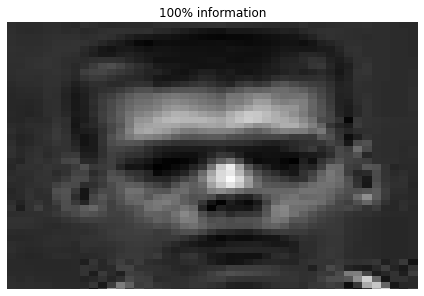

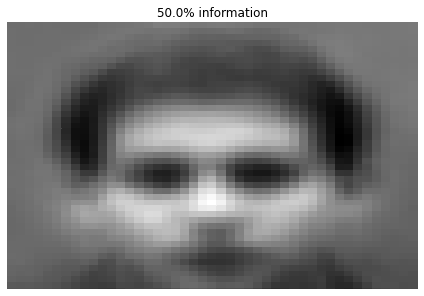

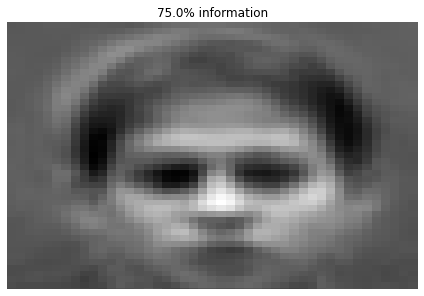

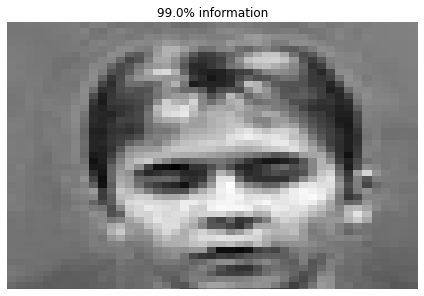

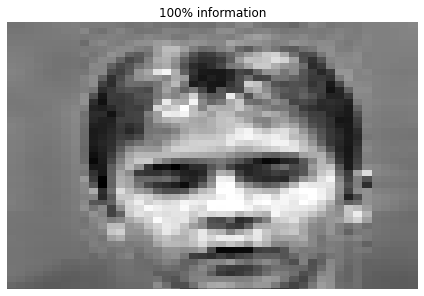

In [7]:
########## YOUR SOLUTION HERE ##########
def plot_comparison(index):
    for var in [0.5, 0.75, .99]:
        components, _ = downprojection(var)
        downtransform = PCA(n_components=components).fit(data)
        transformed = downtransform.transform(data)
        inverse = downtransform.inverse_transform(transformed)
        plotImg(inverse[index, :], "{:.1f}% information".format(var * 100))
    plotImg(data[index, :], "100% information")

for i in range(3):
    plot_comparison(i)

<h3 style="color:rgb(0,120,170)">Task:</h3>

* Comment on your observations. What type of information is preserved using the 3 different compression rates, what is lost?

<h3 style="color:rgb(210,90,80)">Question (5 points):</h3>

########## YOUR SOLUTION HERE ##########

The most informative regions of the image are kept even after downprojecting the data:

- eyes
- mouth
- nose
- shape of the face 
- hair
- contrast (color intensity on a black-white scale)
On the other hand, regions that have less information are smoothed out (lost):

background:
- minor color changes on forehead and cheeks

Even though we downprojected onto 4 dimensions humans can still identify a human face, but we cannot infer accurately information like gender, hair, age etc.

On the second image (75%) we can start to see more differentiated features like hair, lips and nose. Also the face becomes less symmetric.

The third image (99%) almost corresponds 1:1 with the original image. Only some individual pixels are slightly off.

<h2 style="color:rgb(0,120,170)">Task 3: PCA vs. Kernel PCA</h2>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the latter data set has as a third column as label, which should be used for coloring
the plots). First let us read the data, and for pca4 we additionally separate label from date:

In [8]:
#Read data. Nothing to do here!
data3 = np.genfromtxt('pca3.csv', delimiter = ',', skip_header = 0) 
data4 = np.genfromtxt('pca4.csv', delimiter = ',', skip_header = 0)

<h3 style="color:rgb(0,120,170)">Task:</h3>

* Perform PCA for data3 and data4, visualize the principal components together with the data and
determine the proportion of variance for each of the components.

<h3 style="color:rgb(208,90,80)">Code (10 Points):</h3>

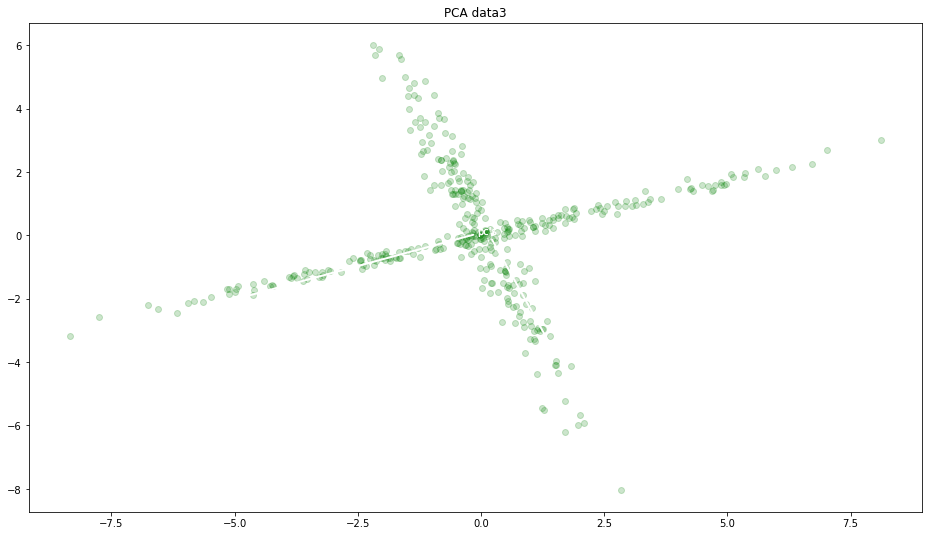

In [9]:
########## YOUR SOLUTION HERE ##########
pca3 = PCA().fit(data3)
plt.figure(figsize=(16,9))
plt.scatter(data3[:, 0], data3[:, 1], color="green", alpha=0.2)
plt.style.use('dark_background')
plt.title("PCA data3")

for length, v in zip(pca3.explained_variance_ratio_, pca3.components_):
    vector = v * length * 10
    plt.annotate("pc's", pca3.mean_ + vector,  pca3.mean_, arrowprops=dict(arrowstyle='->', linewidth=2))

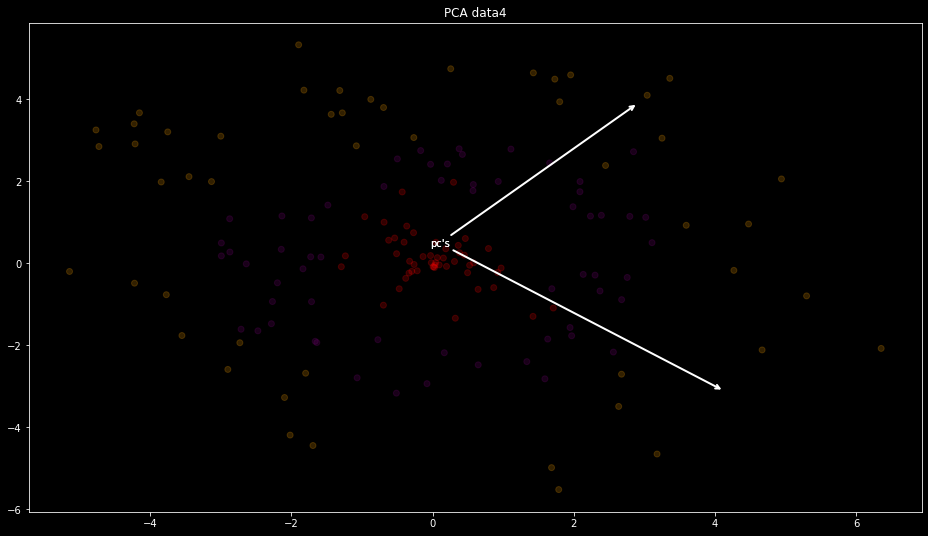

In [10]:
data4_l = data4[:, -1]
data4_r = data4[:, :-1]

plt.figure(figsize=(16,9))
plt.scatter(data4_r[:, 0], data4_r[:, 1], color=[['red', 'purple', 'orange'][i] for i in data4_l.astype(int) - 1], alpha=0.2)
plt.title("PCA data4")

pca4 = PCA().fit(data4_r)
for length, v in zip(pca4.explained_variance_ratio_, pca4.components_):
    vector = v * length * 10
    plt.annotate("pc's", pca4.mean_ + vector,  pca4.mean_, arrowprops=dict(arrowstyle='->', linewidth=2))

<h3 style="color:rgb(0,120,170)">Task:</h3>

* Perform Kernel PCA on both datasets. Try polynomial and RBF-kernels. For polynomial kernel use at least the parameters $\gamma=2$ and degree $3$, for RBF $\gamma=0.25$. You are of course allowed (and encourgaged) to try more different parameters and also different kernels to get a better feeling.

* Also visualize the projected data together with the original ones. 

* Finally, visualize the projection onto the first principal component in the RBF-kernel plots for data4 (can also be done together in one plot). This should also convince you about the fact that the first PC already contains a huge part of the information of the data, e.g. the data can already be well separated by the first PC. 

<h3 style="color:rgb(208,90,80)">Code (20 Points):</h3>

Text(0.5, 1.0, 'Data3 Poly Kernel Pca')

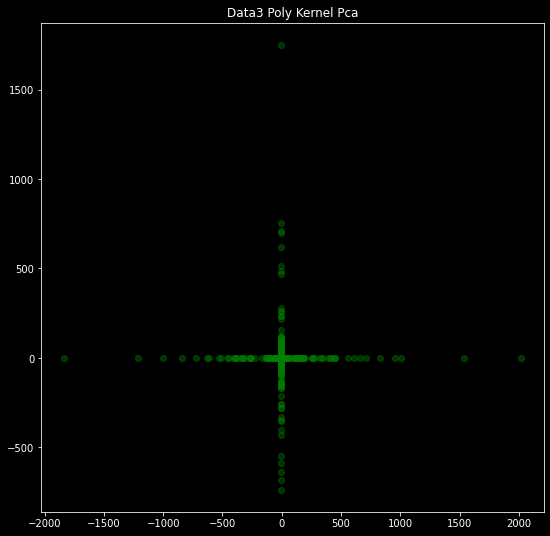

In [11]:
########## YOUR SOLUTION HERE ##########
transformed_data = KernelPCA(gamma=2, degree=3, kernel='poly').fit_transform(data3)
plt.figure(figsize=(9, 9))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color="green", alpha=0.4)
plt.title("Data3 Poly Kernel Pca")

Text(0.5, 1.0, 'Data3 RBF Kernel Pca')

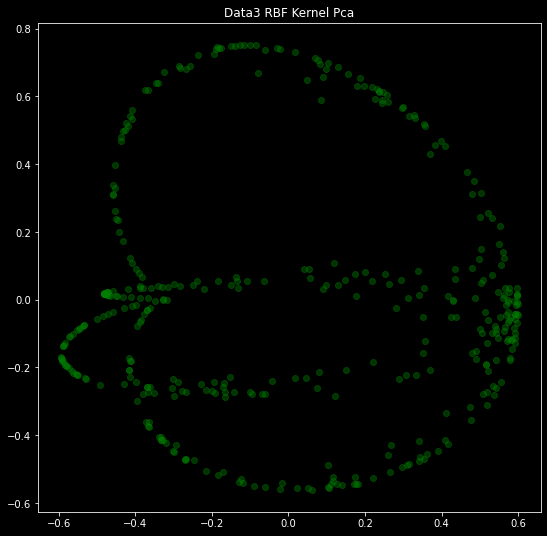

In [12]:
transformed_data = KernelPCA(gamma=0.25, kernel='rbf').fit_transform(data3)
plt.figure(figsize=(9, 9))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color="green", alpha=0.4)
plt.title("Data3 RBF Kernel Pca")

Text(0.5, 1.0, 'Data4 Poly Kernel Pca')

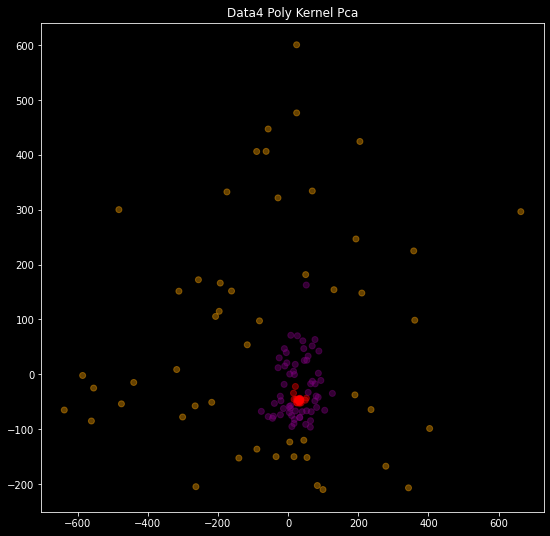

In [13]:
transformed_data = KernelPCA(gamma=2, degree=3, kernel='poly').fit_transform(data4)
plt.figure(figsize=(9, 9))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color=[['red', 'purple', 'orange'][i] for i in data4_l.astype(int) - 1], alpha=0.4)
plt.title("Data4 Poly Kernel Pca")

Text(0.5, 1.0, 'Data4 RBF Kernel Pca')

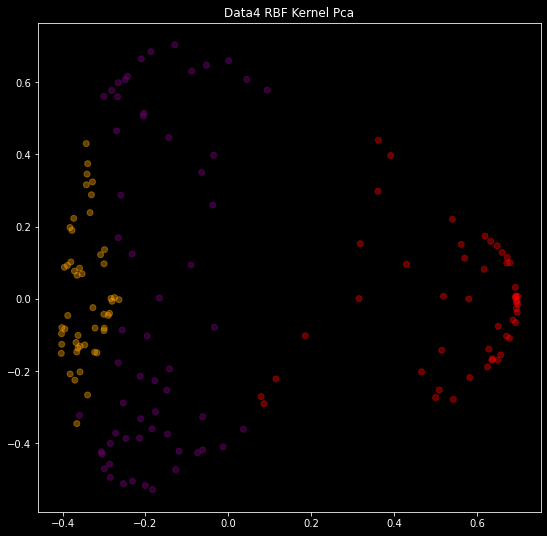

In [14]:
transformed_data = KernelPCA(gamma=0.25, kernel='rbf').fit_transform(data4)
plt.figure(figsize=(9, 9))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color=[['red', 'purple', 'orange'][i] for i in data4_l.astype(int) - 1], alpha=0.4)
plt.title("Data4 RBF Kernel Pca")

In [17]:
data4_l

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3.])

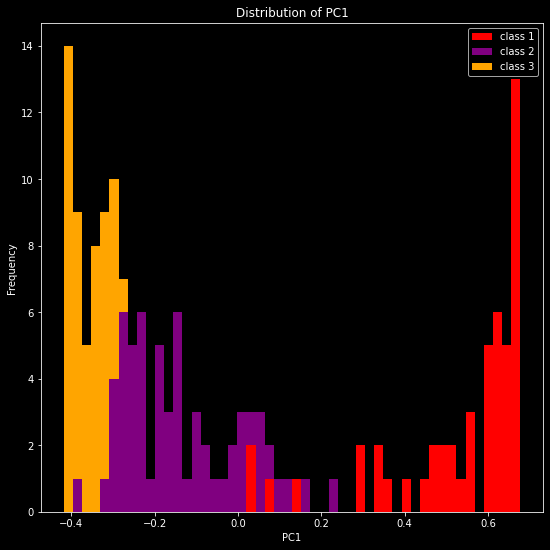

In [15]:
# we create histogram of the first principal component to see good class distribution
data_trans = KernelPCA(n_components=1, gamma=0.25, kernel='rbf').fit_transform(data4_r).ravel()

red = data_trans[data4_l == 1]
blue = data_trans[data4_l == 2]
yellow = data_trans[data4_l == 3]

plt.figure(figsize=(9, 9))
plt.hist([red, blue, yellow], bins=50, stacked=True, color=['red', 'purple', 'orange'])
plt.title('Distribution of PC1')
plt.xlabel('PC1')
plt.ylabel('Frequency')
plt.legend([f'class {i}' for i in [1, 2, 3]])
plt.show()

<h3 style="color:rgb(0,120,170)">Task:</h3>

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without
using a kernel? For which kind of data do you observe them?


<h3 style="color:rgb(208,90,80)">Question (10 Points):</h3>

########## YOUR SOLUTION HERE ##########
- Data3: PCA plots linear separability, using Polynomial Kernel also yields linear separability, however using RBF Kernel distorted the data



- Data4: PCA does not plot linear seperability, using Polynomial Kernel does not plot linear seperability, but using RBF Kernel yields non-linear separability with only the first component already!